# 4. A Practical Example of Wolfram Cloud™ Integration

Below is an example of how to utilise functionality specific to the Wolfram Language in a workflow:

## Access the Wolfram Knowledgebase™ to augment data 

First load a Pandas dataframe with data for World GDP data:

In [1]:
import pandas as pd
import numpy as np

from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [2]:
gdp = pd.read_csv('/tmp/WorldBankGDP.csv', skiprows=4)
gdp = gdp.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis=1)
gdp.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN


In [3]:
print(gdp['1960'].dtypes)

float64


Plot the GDP of each country in 2019 against the population. Define a suitable WL function which takes any country name and returns the population:

In [4]:
gdppop = gdp[gdp['Country Name'] != 'World']

In [4]:
indexNames = gdp[(gdp['Country Name'] == 'World')].index

In [5]:
gdp.drop(indexNames , inplace=True)

In [6]:
def population(country):
    return(session.evaluate(
        wl.QuantityMagnitude(
                wl.EntityValue(wl.Entity("Country", country), "Population")
            )
        )
  )


def population2(country):
    
    pop =  session.evaluate(wl.EntityValue(wl.Entity("Country", country), "Population"))
    
    if session.evaluate(wl.MatchQ(pop, wl.Missing(wl.BlankNullSequence()))):
        return(np.nan)
    else:
        return(session.evaluate(wl.QuantityMagnitude(pop)))
        
    
    
print(population("Andorra"))
print(population2("Andorra"))
print(population("A"))
print(population2("A"))

77146
77146
QuantityMagnitude[Missing['UnknownEntity', ('Country', 'A')]]
nan


Apply this function to the dataframe:

In [7]:
gdp["Population"] = gdp.apply(lambda row: population2(row['Country Name']), axis=1)

In [8]:
gdp[["Country Name", "1960", "Population"]]

,Country Name,1960,Population
0,Aruba,NaN,106310.0
1,Afghanistan,5.377778e+08,38041757.0
2,Angola,NaN,31825299.0
3,Albania,NaN,2880913.0
4,Andorra,NaN,77146.0
...,...,...,...
259,Kosovo,NaN,1859203.0
260,"Yemen, Rep.",NaN,NaN
261,South Africa,7.575397e+09,NaN
262,Zambia,7.130000e+08,17861034.0


Ensure that NaNs imputed are handled correctly:

In [10]:
print(gdp['Population'].dtypes)

float64


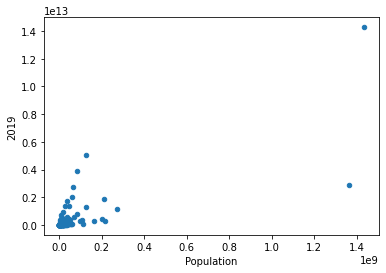

In [11]:
gdp.plot.scatter(x="Population", y="2019");